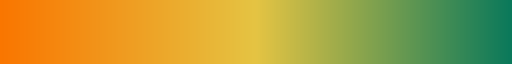

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib as mpl
import shap
import numpy as np

newcmp = mpl.colors.LinearSegmentedColormap.from_list("newcmp", ["#fa7600", "#e5c443", "#0a795b"])
newcmp

In [2]:
def plot_shap(MODEL, TARGET, CONFIG):

    df = pd.read_pickle(f"../results/metrics--{TARGET}--{CONFIG}--{MODEL}.pickle")
    best_idx = df[df.NRMSE == df.NRMSE.min()].index[0]
    # print(best_idx)
    # display(df)
    df = pd.read_pickle(f"../results/predictions--{TARGET}--{CONFIG}--{MODEL}.pickle")
    row = df.loc[best_idx]
    # display(row)

    regressor = row.model_obj
    X_test = row.X_test
    X_train = row.X_train


    feature_mapping = {
        x: x.replace("pr_avg_JJA_median",  "PREC summer avg")\
            .replace("pr_avg_MAM_median",  "PREC spring avg")\
            .replace("tas_avg_JJA_median", "TEMP summer avg")\
            .replace("tas_max_JJA_median", "TEMP summer max")\
            .replace("tas_min_JJA_median", "TEMP summer min")\
            .replace("tas_avg_MAM_median", "TEMP spring avg")\
            .replace("tas_max_MAM_median", "TEMP spring max")\
            .replace("tas_min_MAM_median", "TEMP spring min")\
            .replace("_max", " max")\
            .replace("_min", " min")\
            .replace("_median", " med")\
            .replace("_mean", " avg")\
            .replace("_stdDev", " std")\
            .replace("_stdev", " std")\
            .replace("elevation", "ELE")\
            .replace("slope_percentage", "SLO")\
            .replace("aspect_degree", "ASP")\
            .replace("chm", "CHM")\
        for x in X_test.columns.tolist()
    }

    max_display=15
    explainer = shap.Explainer(regressor, X_test)
    shap_values = explainer(X_test)
    shap.summary_plot(
        shap_values,
        # plot_type='bar',
        feature_names=[feature_mapping[x] for x in X_test.columns],
        show=False,
        plot_type="violin",
        cmap=newcmp,
        max_display=max_display,
        color_bar_label="",
    )
    plt.title(f"{MODEL} estimation of {TARGET} - {CONFIG}", fontsize="xx-large", fontweight="bold")
    plt.ylabel(f"Top {max_display} features", fontsize="xx-large")
    plt.grid()
    plt.tight_layout()
    # plt.show()


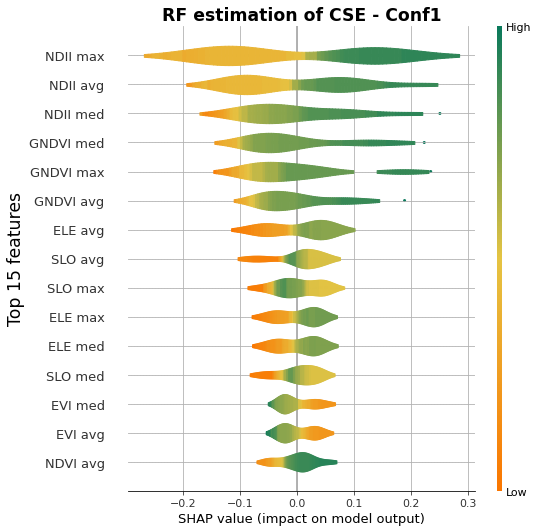

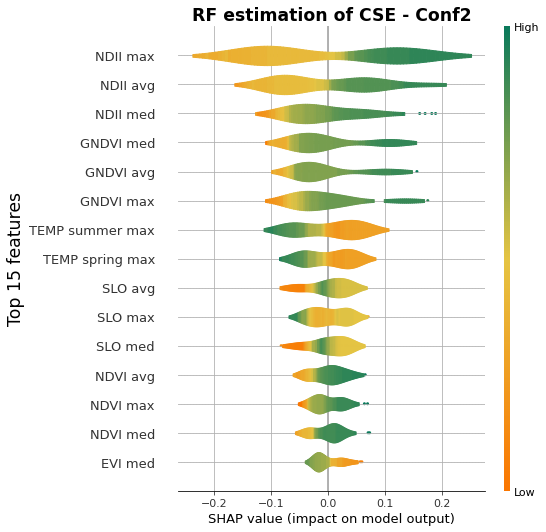

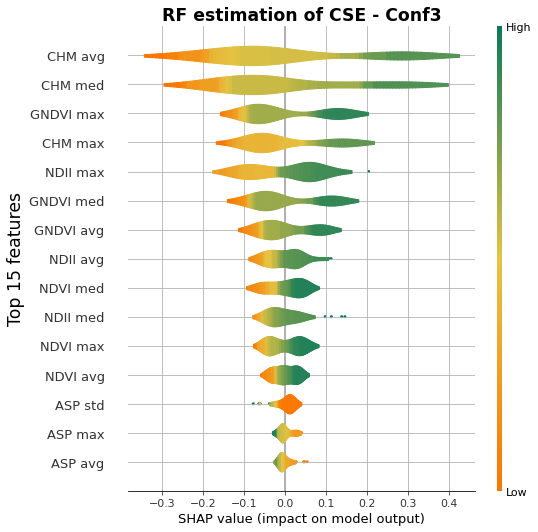

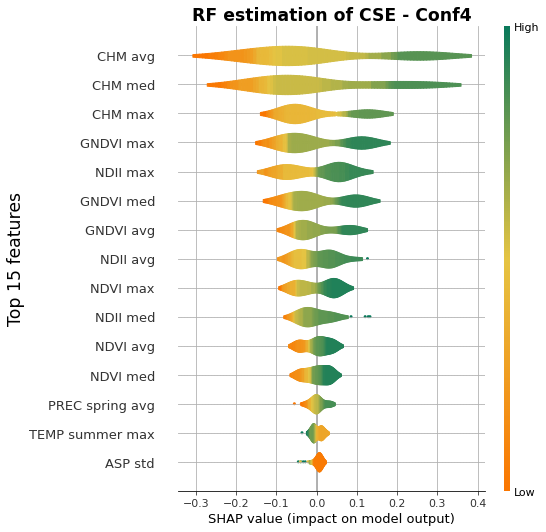

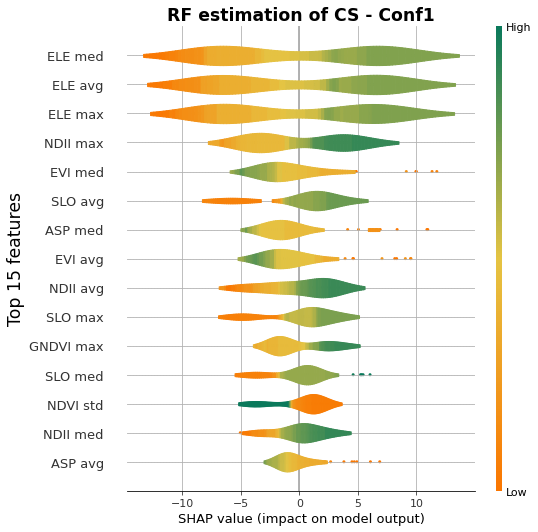

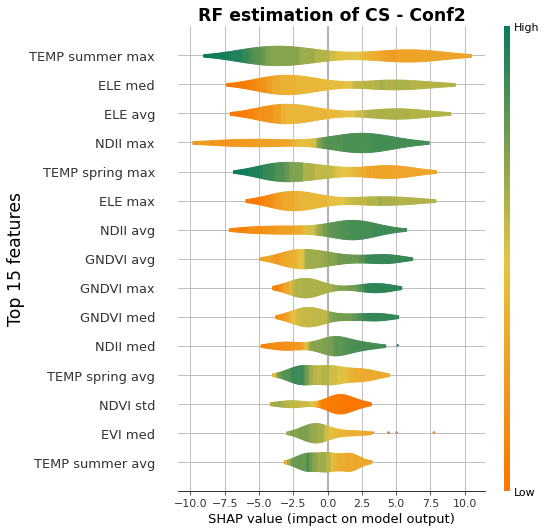

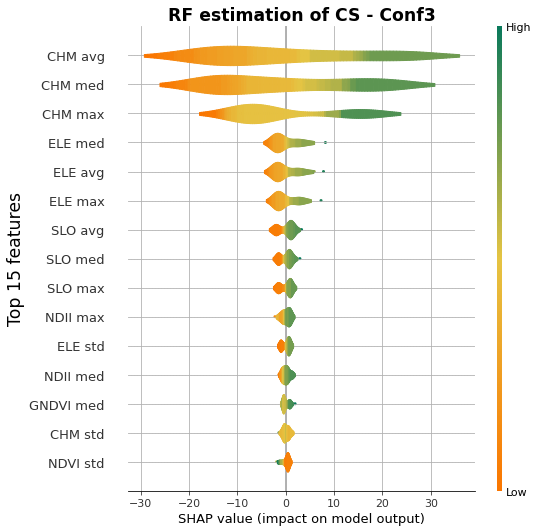

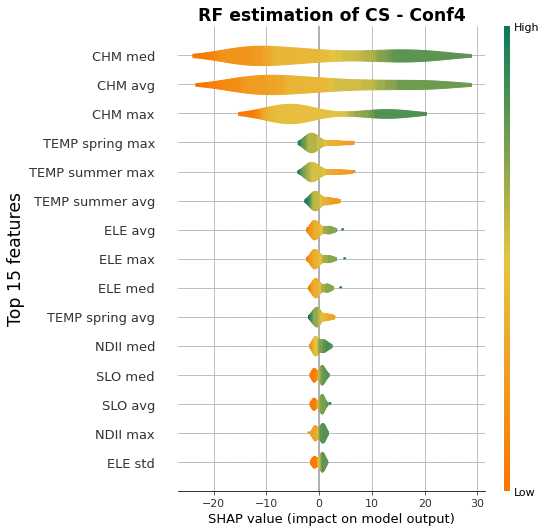

In [3]:
for MODEL in ["RF"]:
    for TARGET in ["CSE", "CS"]:
        for CONFIG in ["Conf1", "Conf2", "Conf3", "Conf4"]:
            plot_shap(MODEL, TARGET, CONFIG)
            plt.savefig(f"../figures_and_tables/figure_shap_{MODEL}_{TARGET}_{CONFIG}.png", dpi=200)
            plt.show()